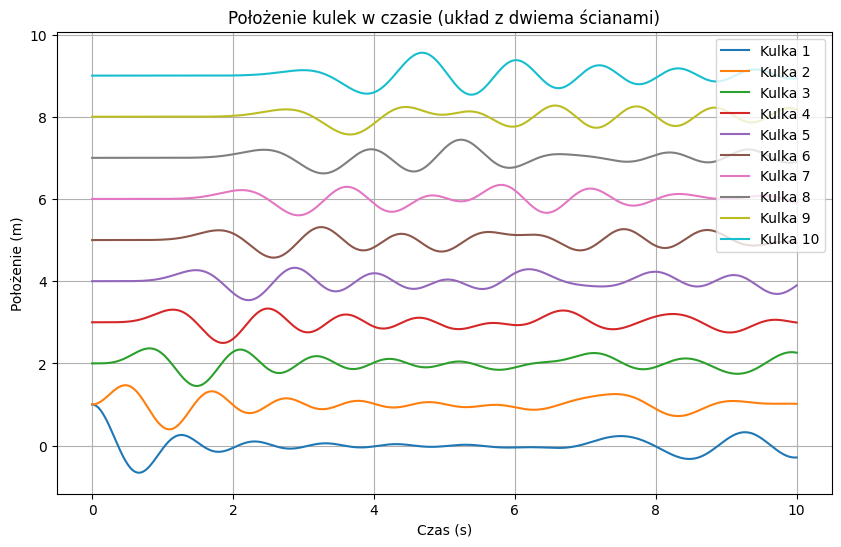

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Parametry układu
N = 10  # liczba kulek
m = 1.0  # masa kulki (kg)
k = 10.0  # stała sprężystości (N/m)
d = 0.1  # tłumienie (N·s/m)
L = 1.0  # długość naturalna sprężyn (m)

# Równania ruchu
def equations(t, y):
    positions = y[:N]  # Położenia kulek
    velocities = y[N:]  # Prędkości kulek

    accelerations = np.zeros(N)
    for i in range(N):
        # Siła od lewej sprężyny (jeśli istnieje lub ściana)
        if i == 0:
            left_force = -k * (positions[i] - 0)  # Sprężyna przy lewej ścianie
        else:
            left_force = -k * ((positions[i] - positions[i-1]) - L)

        # Siła od prawej sprężyny (jeśli istnieje lub ściana)
        if i == N - 1:
            right_force = -k * (positions[i] - (N-1)*L)  # Sprężyna przy prawej ścianie
        else:
            right_force = -k * ((positions[i] - positions[i+1]) + L)

        # Tłumienie
        damping = -d * velocities[i]

        # Całkowita siła / masa = przyspieszenie
        accelerations[i] = (left_force + right_force + damping) / m

    return np.concatenate([velocities, accelerations])

# Warunki początkowe
initial_positions = np.linspace(0, (N-1)*L, N)  # Kulki w równowadze
initial_positions[0] += 0.5  # Zaburzenie tylko pierwszej kulki
initial_velocities = np.zeros(N)  # Brak początkowych prędkości
initial_conditions = np.concatenate([initial_positions, initial_velocities])

# Czas symulacji
t_span = (0, 10)  # Od 0 do 10 sekund
t_eval = np.linspace(0, 10, 1000)  # Punkty czasowe do zapisu wyników

# Rozwiązanie równań ruchu
solution = solve_ivp(equations, t_span, initial_conditions, t_eval=t_eval, method='RK45')

# Wykresy
plt.figure(figsize=(10, 6))
for i in range(N):
    plt.plot(solution.t, solution.y[i], label=f'Kulka {i+1}')

plt.title('Położenie kulek w czasie (układ z dwiema ścianami)')
plt.xlabel('Czas (s)')
plt.ylabel('Położenie (m)')
plt.legend()
plt.grid()
plt.show()
